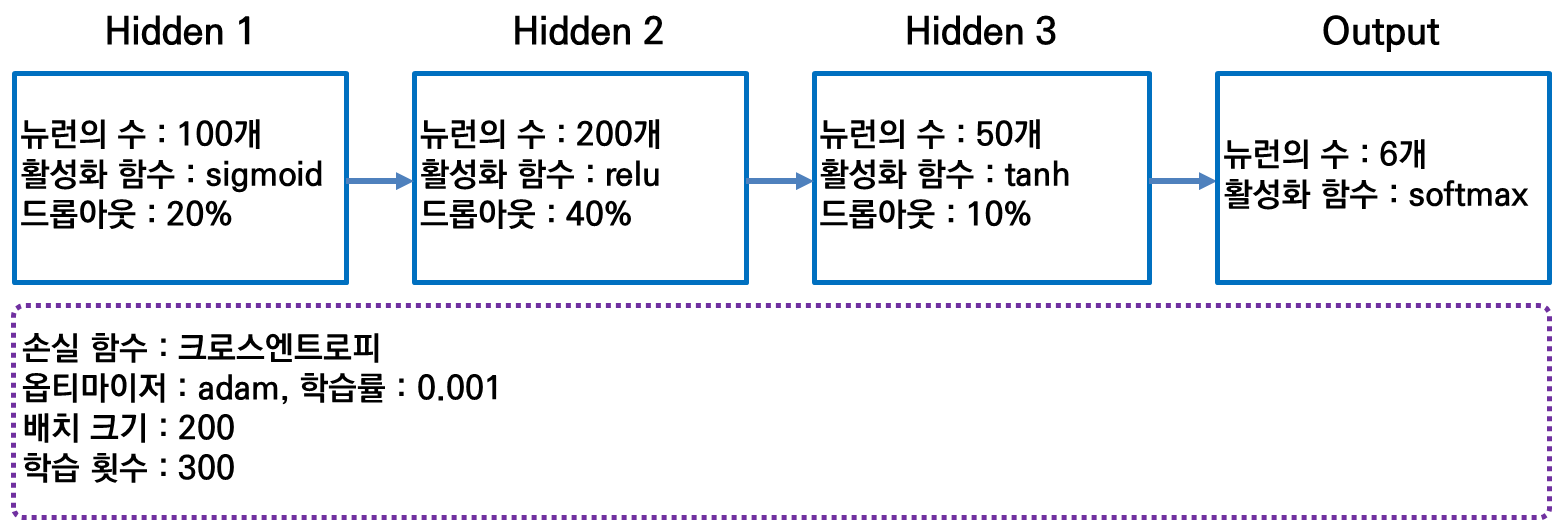

In [4]:
import numpy as np
print(np.__version__)

1.23.5


In [5]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.initializers import RandomNormal

model = Sequential()
model.add(Input(shape=(11,))) # 입력층
model.add(Dense(100, kernel_initializer=RandomNormal(stddev=0.01),
                bias_initializer=RandomNormal(stddev=0.01))) # 첫 번째 은닉층
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(200, activation=relu)) # 두 번째 은닉층
model.add(Dropout(0.4))

model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1200      
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                10050     
                                                                 
 dropout_5 (Dropout)         (None, 50)               

In [6]:
# 데이터 불러오기
import pandas as pd

redwine = pd.read_csv('./winequality-red.csv', sep=';')
# redwine.head()
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1] - 3 # 3~8등급이 있으므로, 0~5등급까지로 수정

In [7]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, test_size=0.3)

In [8]:
# 훈련 정의
from tensorflow.keras.losses import sparse_categorical_crossentropy
def scc(y_true, y_pred):
    return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True) # 출력층의 값을 0~1로 softmax를 적용시켜 정규화해 출력
    
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
#              metrics=['accuracy'])
# 함수로 정의해서 사용
model.compile(loss=scc, optimizer='adam',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='wine_logs', embeddings_freq=1, histogram_freq=1)

In [10]:
# 학습
#history = model.fit(train_X, train_y, batch_size=200, epochs=300)
history = model.fit(train_X, train_y, batch_size=200, epochs=100, callbacks=[tensorboard])

Epoch 1/100


C:\Users\KOSA\AppData\Local\anaconda3\envs\tf2.14\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 1s 31ms/step - loss: 1.4864 - accuracy: 0.3485
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2327 - accuracy: 0.4486
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2209 - accuracy: 0.4415
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2087 - accuracy: 0.4388
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 1.1926 - accuracy: 0.4477
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 1.1825 - accuracy: 0.4549
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 1.1712 - accuracy: 0.4540
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 1.1699 - accuracy: 0.4593
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 1.1663 - accuracy: 0.4576
Epoch 10/100
6/6 [==============================] - 0s 20ms/step - loss: 1.1452 - accuracy: 0.4701
Epoch 11/100
6/6 [=============

In [11]:
# 평가
model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 926us/step - loss: 1.0461 - accuracy: 0.5583


C:\Users\KOSA\AppData\Local\anaconda3\envs\tf2.14\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[1.0461208820343018, 0.5583333373069763]